In [1]:
# Import pandas
import pandas as pd

In [2]:
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Credit_Card.csv')

In [3]:
# Top 5 rows
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# Shape of the data
data.shape

(30000, 25)

In [5]:
# Checking null values
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
# Check the percentage distribution of each class 
data['default.payment.next.month'].value_counts(normalize=True)*100 

0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64

In [7]:
# Defining the features
X = data.iloc[:,1:-1].values # input features
y = data.iloc[:,-1].values # output feature

#**Pricipal Component Analysis (PCA)**

In [8]:
# Scalling the data
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [9]:
# Fitting PCA to analyze components
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

PCA()

In [10]:
# features sorted based on eigen values
pca.explained_variance_

array([2.39921405e-01, 6.23298672e-02, 4.07593979e-02, 2.39375742e-02,
       1.66483704e-02, 1.42113781e-02, 9.28602578e-03, 7.87094875e-03,
       5.45234314e-03, 3.63128812e-03, 2.69052558e-03, 1.81099941e-03,
       1.34499878e-03, 1.09886467e-03, 1.00061702e-03, 5.97020005e-04,
       4.31000732e-04, 3.43514409e-04, 2.39650560e-04, 1.43196025e-04,
       1.08669361e-04, 7.41323540e-05, 3.79534566e-05])

In [11]:
# Percentage contribution of each feature
pca.explained_variance_ratio_

array([5.52852843e-01, 1.43627219e-01, 9.39222117e-02, 5.51595468e-02,
       3.83629752e-02, 3.27473940e-02, 2.13978647e-02, 1.81370912e-02,
       1.25638786e-02, 8.36760671e-03, 6.19979995e-03, 4.17310065e-03,
       3.09929161e-03, 2.53212278e-03, 2.30572994e-03, 1.37571805e-03,
       9.93158489e-04, 7.91563044e-04, 5.52228734e-04, 3.29967764e-04,
       2.50407693e-04, 1.70823786e-04, 8.74564585e-05])

In [12]:
# Explained variance ration cumulative sum
pca.explained_variance_ratio_.cumsum()

array([0.55285284, 0.69648006, 0.79040227, 0.84556182, 0.8839248 ,
       0.91667219, 0.93807005, 0.95620715, 0.96877102, 0.97713863,
       0.98333843, 0.98751153, 0.99061082, 0.99314295, 0.99544868,
       0.99682439, 0.99781755, 0.99860912, 0.99916134, 0.99949131,
       0.99974172, 0.99991254, 1.        ])

Text(0.5, 1.0, 'Scree plot')

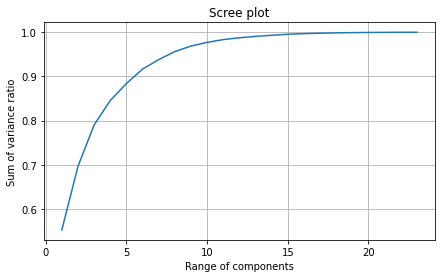

In [13]:
# Variance Vs Component plot
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,4))
plt.plot(range(1,24,1),np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Sum of variance ratio')
plt.xlabel('Range of components')
plt.grid()
plt.title('Scree plot')

In [14]:
# Choosing optimal component to be 11 as per the plot. 11 components are adddressing 98% of the variance
pca = PCA(n_components=11)
pca.fit(X)

PCA(n_components=11)

In [15]:
pca.explained_variance_

array([0.2399214 , 0.06232987, 0.0407594 , 0.02393757, 0.01664837,
       0.01421138, 0.00928603, 0.00787095, 0.00545234, 0.00363129,
       0.00269053])

In [16]:
pca.explained_variance_ratio_

array([0.55285284, 0.14362722, 0.09392221, 0.05515955, 0.03836298,
       0.03274739, 0.02139786, 0.01813709, 0.01256388, 0.00836761,
       0.0061998 ])

In [17]:
pca.explained_variance_ratio_.cumsum()

array([0.55285284, 0.69648006, 0.79040227, 0.84556182, 0.8839248 ,
       0.91667219, 0.93807005, 0.95620715, 0.96877102, 0.97713863,
       0.98333843])

In [18]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(pca.transform(X),y,random_state=0, test_size = 0.2)

In [19]:
# Creating the training and test sets
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((24000, 11), (24000,), (6000, 11), (6000,))

#**Balancing the data using SMOTE**

In [20]:
# Counting the labels before resampling
print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1)))
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train == 0)))

Before SMOTE, counts of label '1': 5339
Before SMOTE, counts of label '0': 18661 



In [21]:
# Using SMOTE resampling for balancing the class labels
from imblearn.over_sampling import SMOTE
smt = SMOTE(k_neighbors=5, random_state=42)
x_train_res, y_train_res = smt.fit_resample(x_train, y_train)

print('After SMOTE, the shape of train_X: {}'.format(x_train_res.shape))
print('After SMOTE, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After SMOTE, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After SMOTE, counts of label '0': {}".format(sum(y_train_res == 0)))


After SMOTE, the shape of train_X: (37322, 11)
After SMOTE, the shape of train_y: (37322,) 

After SMOTE, counts of label '1': 18661
After SMOTE, counts of label '0': 18661


In [22]:
# Defining the logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)

In [23]:
# Training the logistic regression model
model.fit(x_train_res, y_train_res)

LogisticRegression(random_state=0)

In [24]:
# Making predictions with the trained model
y_pred = model.predict(x_test)

In [25]:
# Confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[3320, 1383],
       [ 471,  826]])

In [26]:
# Test accuracy
model.score(x_test,y_test)

0.691

In [27]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78      4703
           1       0.37      0.64      0.47      1297

    accuracy                           0.69      6000
   macro avg       0.62      0.67      0.63      6000
weighted avg       0.77      0.69      0.71      6000

